# Estimation of obesity levels based on eating habits and physical condition

## Information

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

#### Source : (https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+)

## Atribute Information

### The attributes related with eating habits are: 
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables(FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC)
### The attributes related with the physical condition are: 
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)
### other variables obtained were: 
- Gender
- Age
- Height
- Weight
- Family history with overweight
- SMOKE
- NObesity was created with the values of: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity   Type I, Obesity Type II and Obesity Type III

# Importing Data 

In [1]:
import pandas as pd 
dataset = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [2]:
df = dataset.copy(deep = True)
# Making copy of dataset

# Exploratory Data Analysis (EDA)

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
# Changing the old column names to new for better understanding
# Total no. of columns = 17
# Old names --------> New names
# Gender-----------------------------Gender
# Age--------------------------------Age
# Height-----------------------------Height
# Weight-----------------------------Weight
# Family_history_with_overweight-----Family_history_with_overweight
# FAVC-------------------------------FCOHCF (Frequent consumption of high calorie food)
# FCVC-------------------------------FCOV (Frequent consumption of vegetables)
# NCP--------------------------------NMM (Number of main meals)
# CAEC-------------------------------COFBM (Consumption of food between meals)
# Smoke------------------------------Smoke
# CH2O-------------------------------CH2O (Consumption of water daily)
# SCC--------------------------------Calorie_Consump_Monitoring
# FAF--------------------------------Physical_Activity_F (Physical activity frequency)
# TUE--------------------------------Time_using_techno_D (Time using technology devices )
# CALC-------------------------------Consumption_Alc (Consumption of alcohol)
# MTRANS-----------------------------MTRANS (Transportation used)
# NObeyesdad-------------------------NObesity
new_columns = ['Gender', 'Age', 'Height', 'Weight', 'Family_history_with_overweight', 'FCOHCF', 'FCOV', 'NMM', 'COFBM', 'Smoke', 'CH2O', 'Calorie_Consump_Monitoring', 'Physical_Activity_F', 'Time_using_techno_D', 'Consumption_Alc', 'MTRANS', 'NObesity']
print('Length of new columns :- ',len(new_columns))

Length of new columns :-  17


In [5]:
# Assigning new names to columns
df.columns = new_columns 

In [6]:
df.head()

,Gender,Age,Height,Weight,Family_history_with_overweight,FCOHCF,FCOV,NMM,COFBM,Smoke,CH2O,Calorie_Consump_Monitoring,Physical_Activity_F,Time_using_techno_D,Consumption_Alc,MTRANS,NObesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
df.tail()

,Gender,Age,Height,Weight,Family_history_with_overweight,FCOHCF,FCOV,NMM,COFBM,Smoke,CH2O,Calorie_Consump_Monitoring,Physical_Activity_F,Time_using_techno_D,Consumption_Alc,MTRANS,NObesity
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [8]:
df.size

35887

In [9]:
df.shape

(2111, 17)

In [10]:
# Summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   Family_history_with_overweight  2111 non-null   object 
 5   FCOHCF                          2111 non-null   object 
 6   FCOV                            2111 non-null   float64
 7   NMM                             2111 non-null   float64
 8   COFBM                           2111 non-null   object 
 9   Smoke                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  Calorie_Consump_Monitoring      2111 non-null   object 
 12  Physical_Activity_F             21

Here we have total 17 columns as described below with 2110 instances.

Out of which 8 column are numerical and 9 are catagorical.

## Catagorical Column

### Nominal
- Gender
- family_history_with_overweight  
- FCOHCF
- COFBM  
- Smoke  
- Calorie_Consump_Monitoring
- Consumption_Alc 
- MTRANS  

### Ordinal
- NObesity                        

## Numerical Column
### Continuous
- Age                            
- Height                        
- Weight
- FCOV                     
- NMM
- CH2O     
- Physical_Activity_F           
- Time_using_techno_D         

In [11]:
# Statistical insights of numerical columns
df.describe()

,Age,Height,Weight,FCOV,NMM,CH2O,Physical_Activity_F,Time_using_techno_D
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Looking at above statistical analysis it is found that skewness is present in some of the columns like Age, Weight, FCOV, NMM.

In [12]:
# Statistical insights of catagorical columns
df.describe(include=object)

,Gender,Family_history_with_overweight,FCOHCF,COFBM,Smoke,Calorie_Consump_Monitoring,Consumption_Alc,MTRANS,NObesity
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


#### Printing unique values from each column
**Unique values of catagorical column**

In [13]:
df['Gender'].value_counts()

Male      1068
Female    1043
Name: Gender, dtype: int64

In [14]:
df['Family_history_with_overweight'].value_counts()

yes    1726
no      385
Name: Family_history_with_overweight, dtype: int64

In [15]:
df['FCOHCF'].value_counts()

yes    1866
no      245
Name: FCOHCF, dtype: int64

In [16]:
df['COFBM'].value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: COFBM, dtype: int64

In [17]:
df['Smoke'].value_counts()

no     2067
yes      44
Name: Smoke, dtype: int64

In [18]:
df['Calorie_Consump_Monitoring'].value_counts()

no     2015
yes      96
Name: Calorie_Consump_Monitoring, dtype: int64

In [19]:
df['Consumption_Alc'].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: Consumption_Alc, dtype: int64

In [20]:
df['MTRANS'].value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

In [21]:
df['NObesity'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObesity, dtype: int64

Our target column further contains total seven catagories and all this data is well balanced so in preprocessing will use Random sampling method.

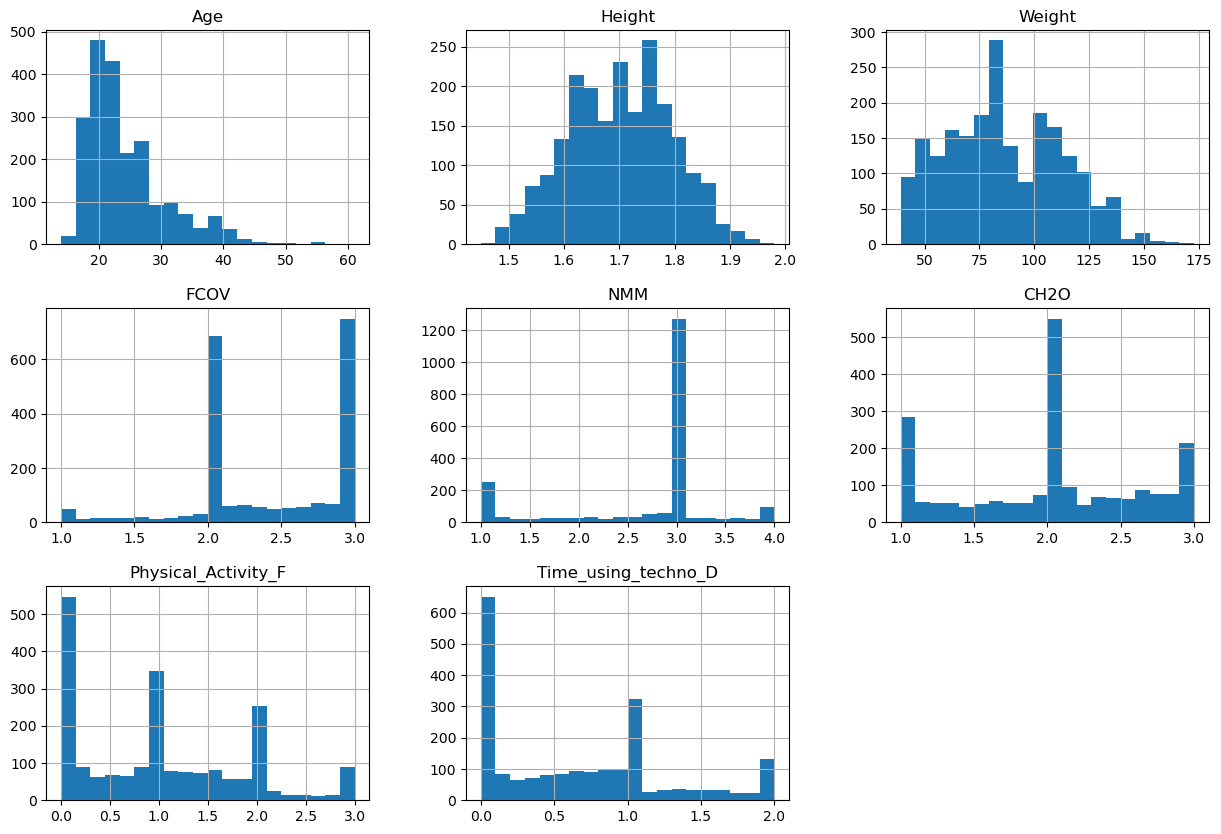

In [22]:
# Plotting histogram
df.hist(figsize=(15,10), bins=20)
plt.show()

The above diagrams represent frequency of each continuous value.
- we have maximum number of people between age range of 20-30.
- Physical activity frequency is varying with very less people working out daily.
- more than 1200 people prefer three main meals.
- Frequency of consumpion of vegetables is high.

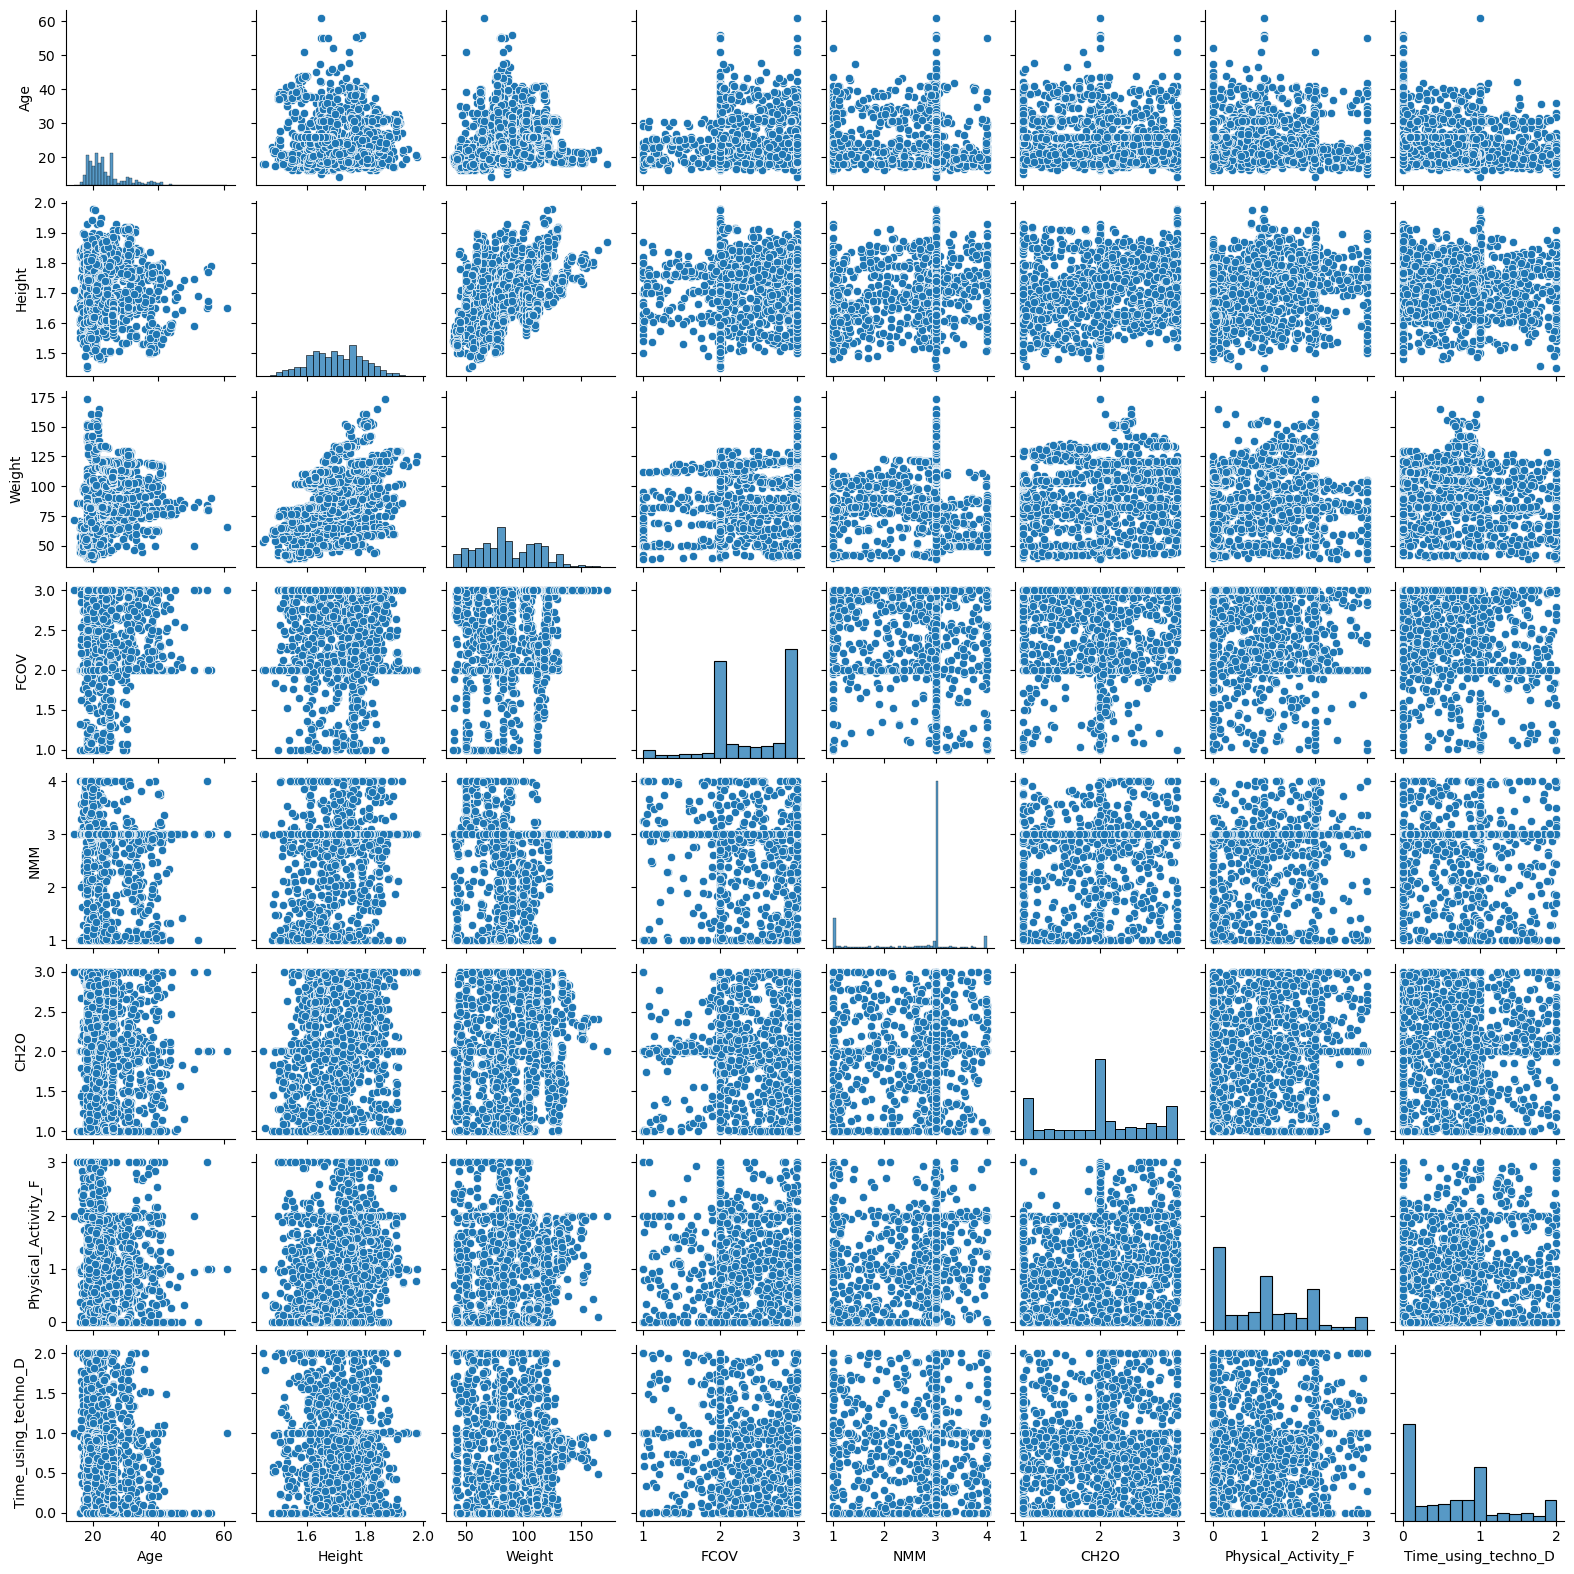

In [23]:
# Pairwise relationships in a dataset
sns.pairplot(df, height=2)

In [24]:
# Pairwise correlation
df.corr()

,Age,Height,Weight,FCOV,NMM,CH2O,Physical_Activity_F,Time_using_techno_D
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCOV,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NMM,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
Physical_Activity_F,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
Time_using_techno_D,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


<Axes: >

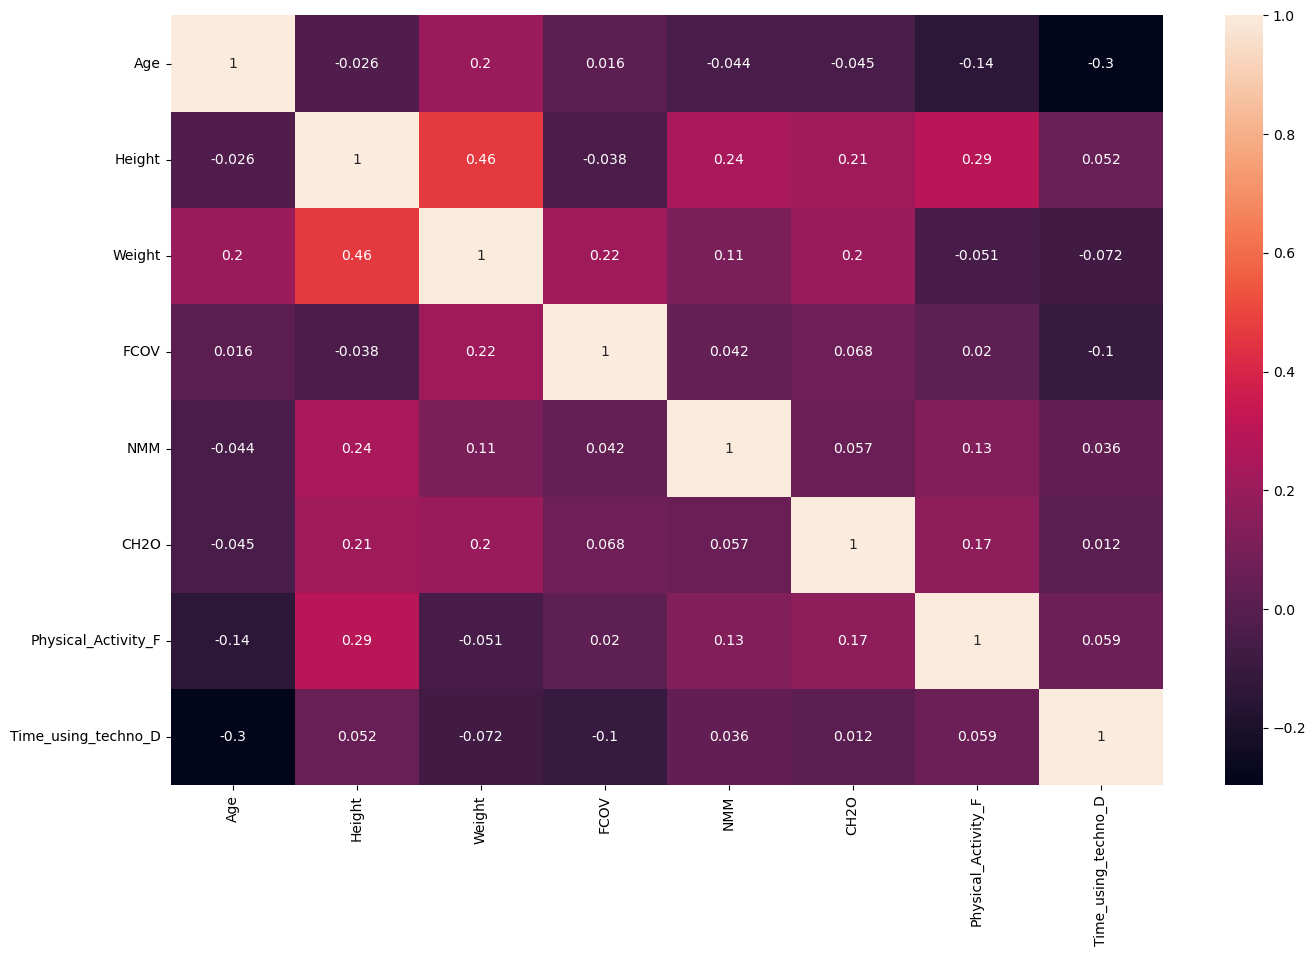

In [25]:
# Heatmap of correlation matrix
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)

Above diagram represents heatmap of correlation.
- Only Height and Weight column shows correlation.

In [26]:
# Checking for not available values
df.isna().any()

Gender                            False
Age                               False
Height                            False
Weight                            False
Family_history_with_overweight    False
FCOHCF                            False
FCOV                              False
NMM                               False
COFBM                             False
Smoke                             False
CH2O                              False
Calorie_Consump_Monitoring        False
Physical_Activity_F               False
Time_using_techno_D               False
Consumption_Alc                   False
MTRANS                            False
NObesity                          False
dtype: bool

In [27]:
# Checking for null values
df.isnull().any()

Gender                            False
Age                               False
Height                            False
Weight                            False
Family_history_with_overweight    False
FCOHCF                            False
FCOV                              False
NMM                               False
COFBM                             False
Smoke                             False
CH2O                              False
Calorie_Consump_Monitoring        False
Physical_Activity_F               False
Time_using_techno_D               False
Consumption_Alc                   False
MTRANS                            False
NObesity                          False
dtype: bool

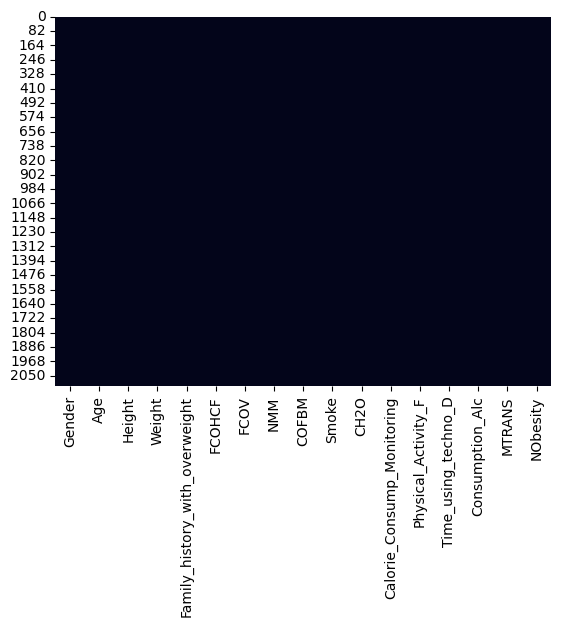

In [28]:
# Heatmap of null values
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Dataset does not contain any null values.

#### Cross Tabulation
**Genderwise preference of mode of transportation**

In [29]:
pd.crosstab(df['MTRANS'],df['Gender'])

Gender,Female,Male
MTRANS,,
Automobile,166,291
Bike,0,7
Motorbike,2,9
Public_Transportation,854,726
Walking,21,35


**Consumption of alcohol based on gender**

In [30]:
pd.crosstab(df['Consumption_Alc'],df['Gender'] )

Gender,Female,Male
Consumption_Alc,,
Always,0,1
Frequently,28,42
Sometimes,711,690
no,304,335


**Consumption of food between meals**

In [31]:
pd.crosstab(df['COFBM'],df['Gender'] )

Gender,Female,Male
COFBM,,
Always,23,30
Frequently,161,81
Sometimes,844,921
no,15,36


**Obesity status based on gender**

In [32]:
pd.crosstab(df['NObesity'],df['Gender'] )

Gender,Female,Male
NObesity,,
Insufficient_Weight,173,99
Normal_Weight,141,146
Obesity_Type_I,156,195
Obesity_Type_II,2,295
Obesity_Type_III,323,1
Overweight_Level_I,145,145
Overweight_Level_II,103,187


<Axes: xlabel='Gender', ylabel='Age'>

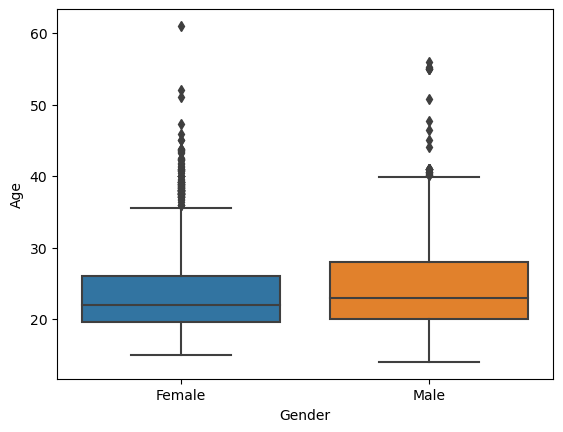

In [33]:
# Box plot with respective catagories
sns.boxplot(x='Gender',y='Age',data=df)

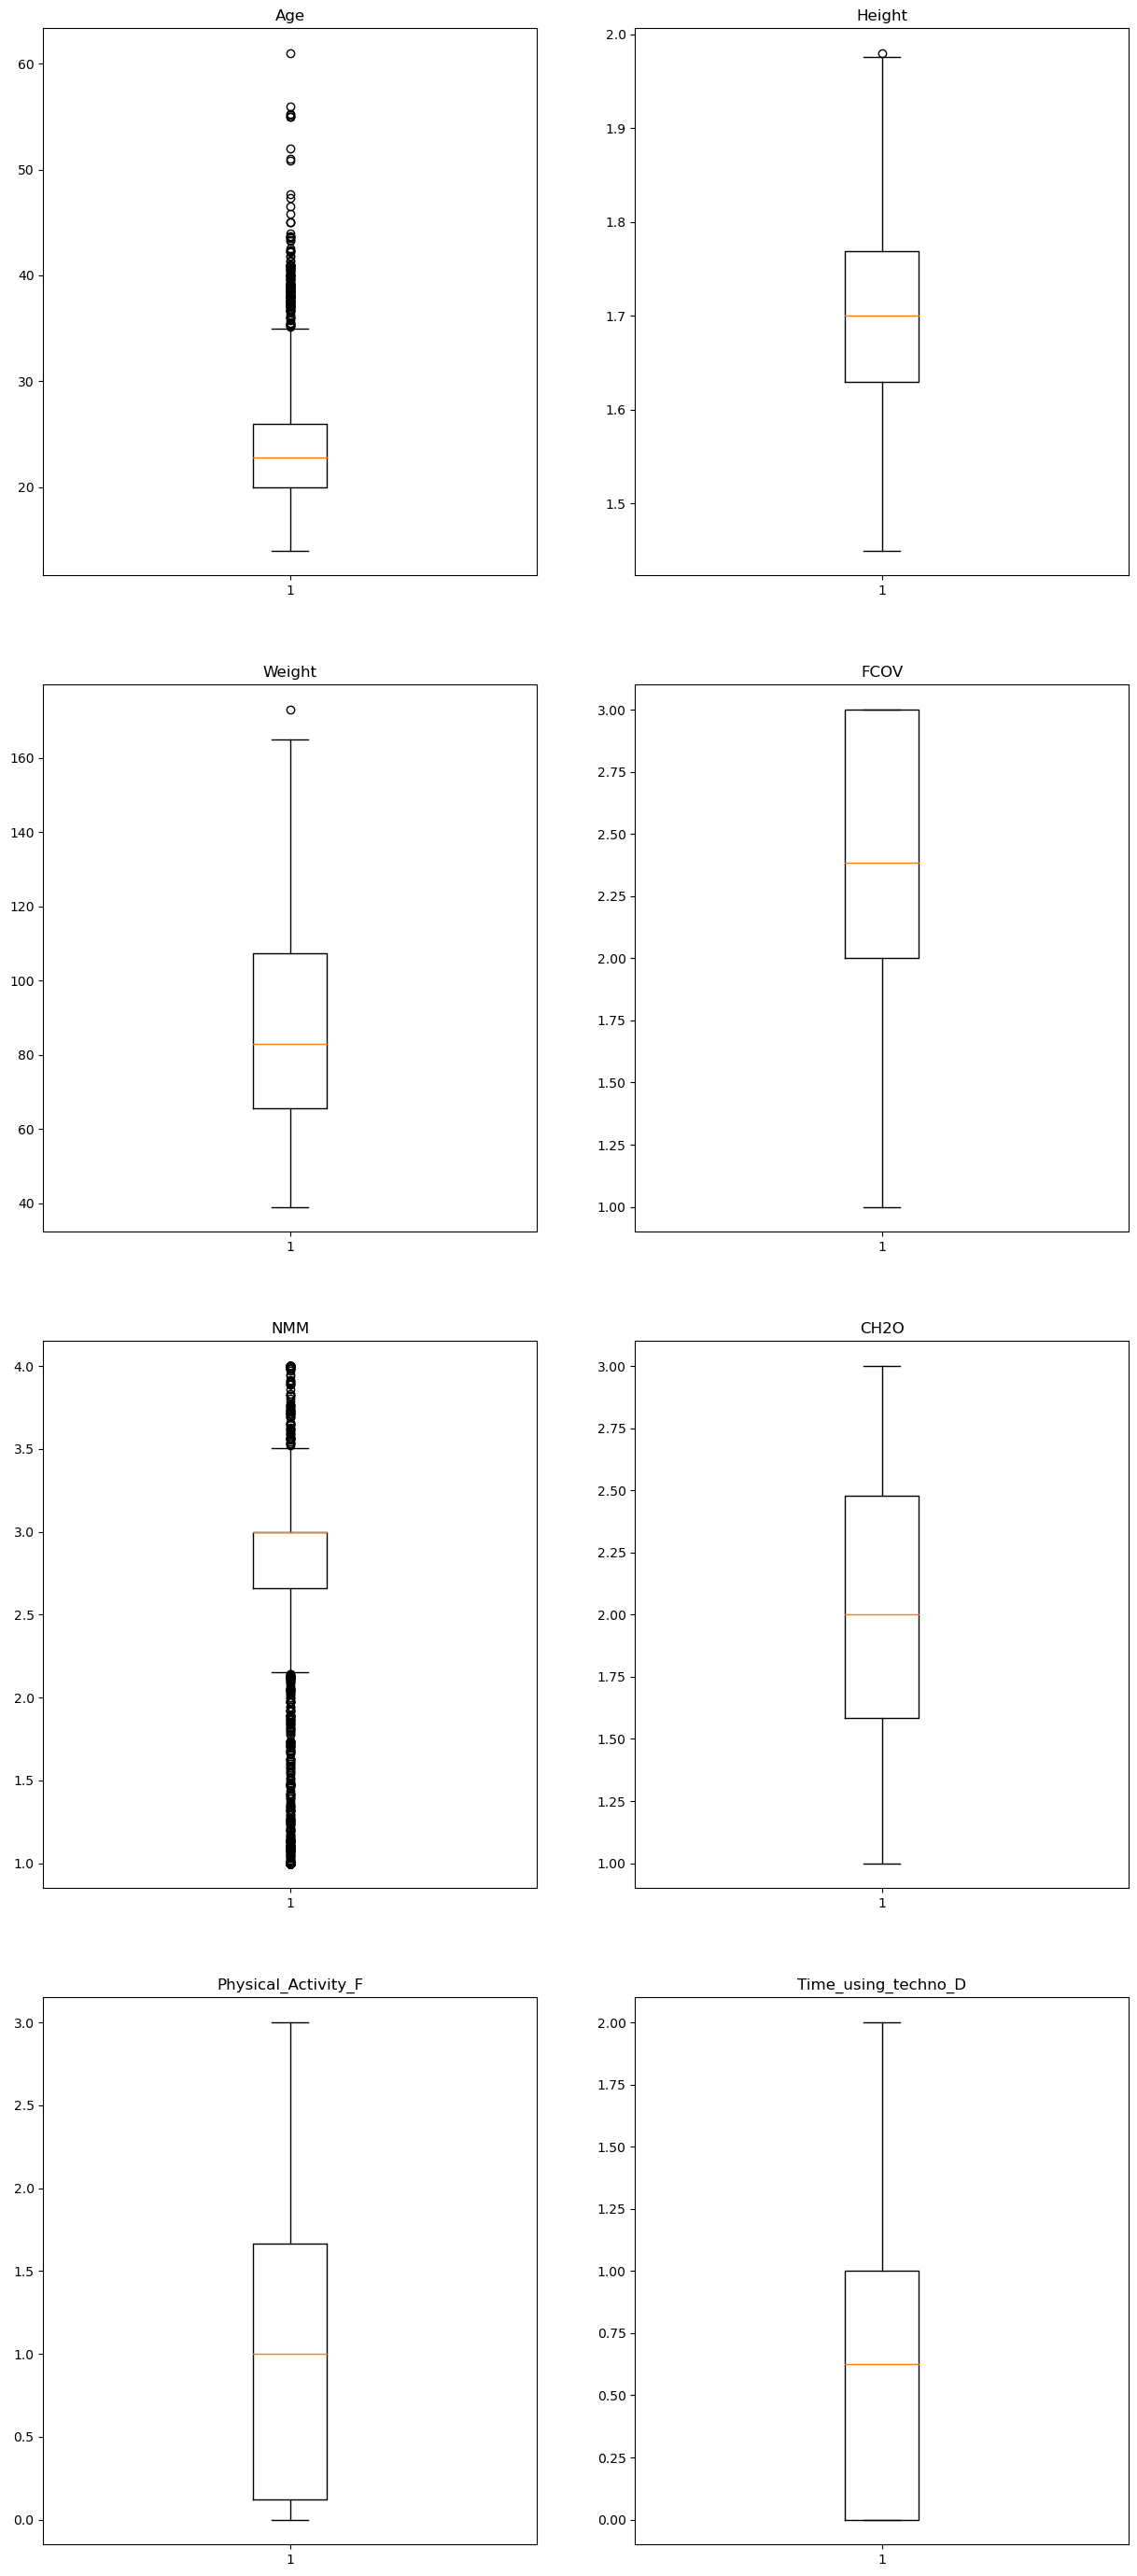

In [34]:
# Box plot
plt.figure(figsize=(15,35))
plt.subplot(4,2,1)
plt.boxplot(df.Age)
plt.title('Age')
plt.subplot(4,2,2)
plt.boxplot(df.Height)
plt.title('Height')
plt.subplot(4,2,3)
plt.boxplot(df.Weight)
plt.title('Weight')
plt.subplot(4,2,4)
plt.boxplot(df.FCOV)
plt.title('FCOV')
plt.subplot(4,2,5)
plt.boxplot(df.NMM)
plt.title('NMM')
plt.subplot(4,2,6)
plt.boxplot(df.CH2O)
plt.title('CH2O')
plt.subplot(4,2,7)
plt.boxplot(df.Physical_Activity_F)
plt.title('Physical_Activity_F')
plt.subplot(4,2,8)
plt.boxplot(df.Time_using_techno_D)
plt.title('Time_using_techno_D')
plt.show()

Above boxplot represent graphical visualization of outliers in dataset. 
Presence of outliers can greatly affect the performance of ML algorithms therefore it is very important to handle outliers.
- We have outliers present in number of meals(NMM), Height, weight and Age column.
- will handle outliers in preprocessing stage.

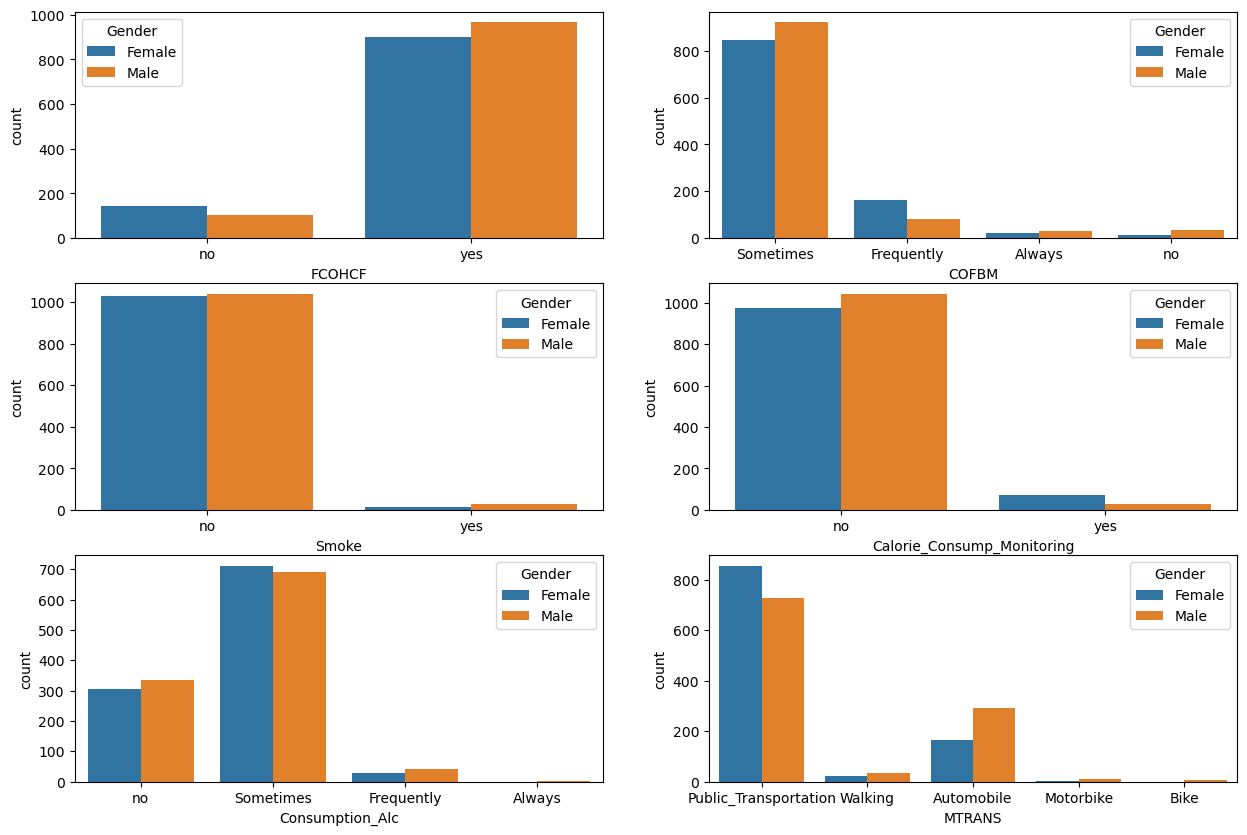

In [35]:
# Countplot for catagorical atributes
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.countplot(data= df, x ='FCOHCF',hue='Gender')
plt.subplot(3,2,2)
sns.countplot(data= df, x ='COFBM',hue='Gender')
plt.subplot(3,2,3)
sns.countplot(data= df, x ='Smoke',hue='Gender')
plt.subplot(3,2,4)
sns.countplot(data= df, x ='Calorie_Consump_Monitoring',hue='Gender')
plt.subplot(3,2,5)
sns.countplot(data= df, x ='Consumption_Alc',hue='Gender')
plt.subplot(3,2,6)
sns.countplot(data= df, x ='MTRANS',hue='Gender')
plt.show()

Above countplot represents catagorical values with refference to Age.
- Frequency of consumtion of high calorie food is more in both males and females.
- Both males and females preffer public transportation.
- very small quantity of population monitors calorie intake.
- out of all population more than 1600 people like to eat between their main meals.

**Scatterplot of how obesity varies with Physical activity and Age**

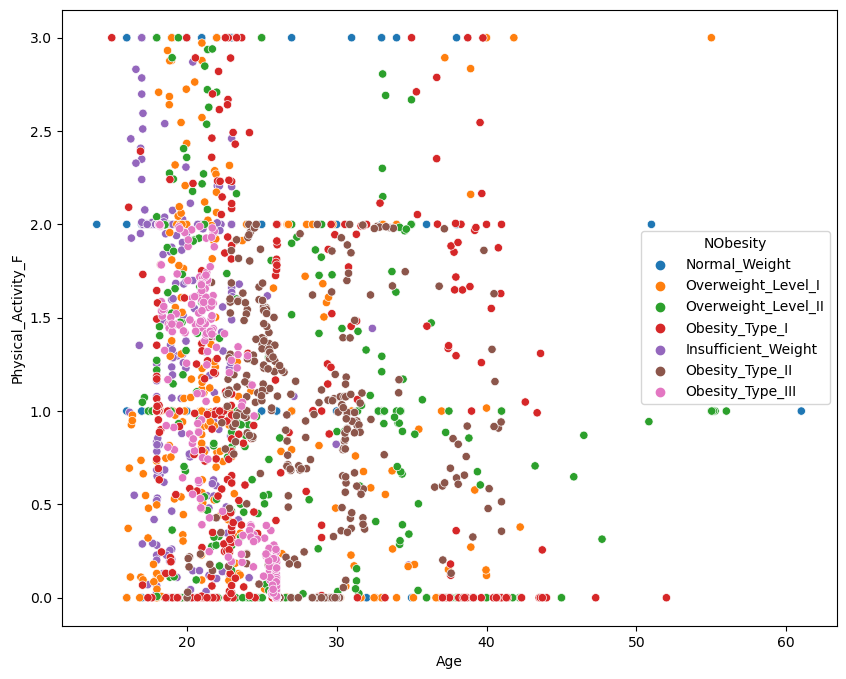

In [36]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age', y='Physical_Activity_F',data=df, hue = 'NObesity')
plt.show()

**Variation of obsity according to Weight and Age**

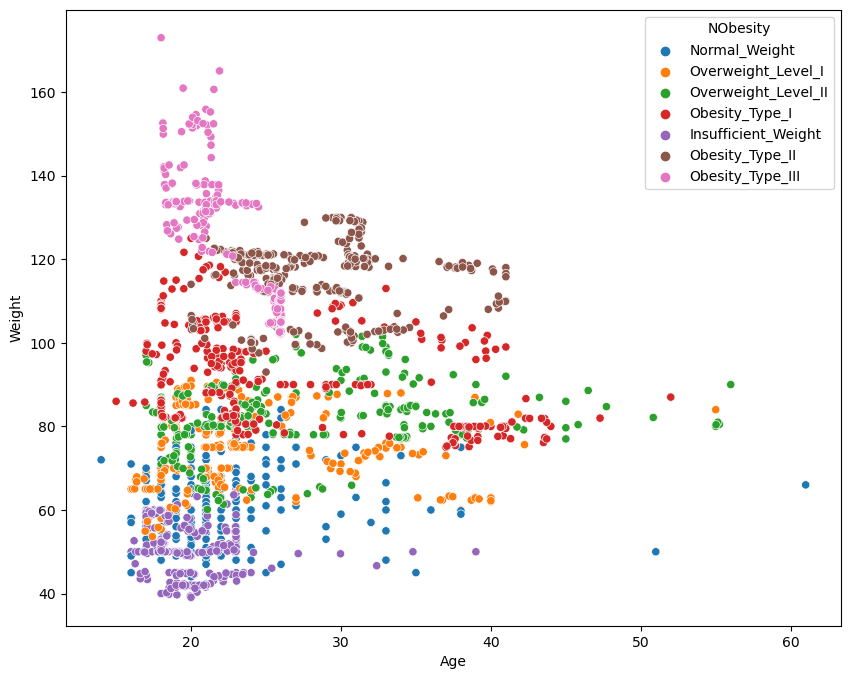

In [37]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age', y='Weight',data=df, hue = 'NObesity')
plt.show()

**Variation of obesity according to Weight and Height**

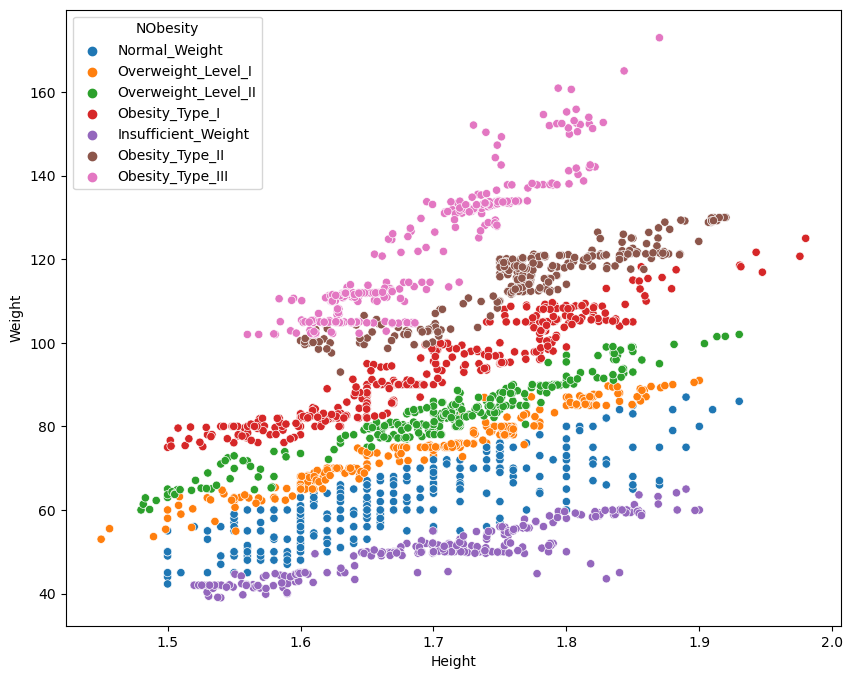

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Height', y='Weight',data=df, hue = 'NObesity')
plt.show()

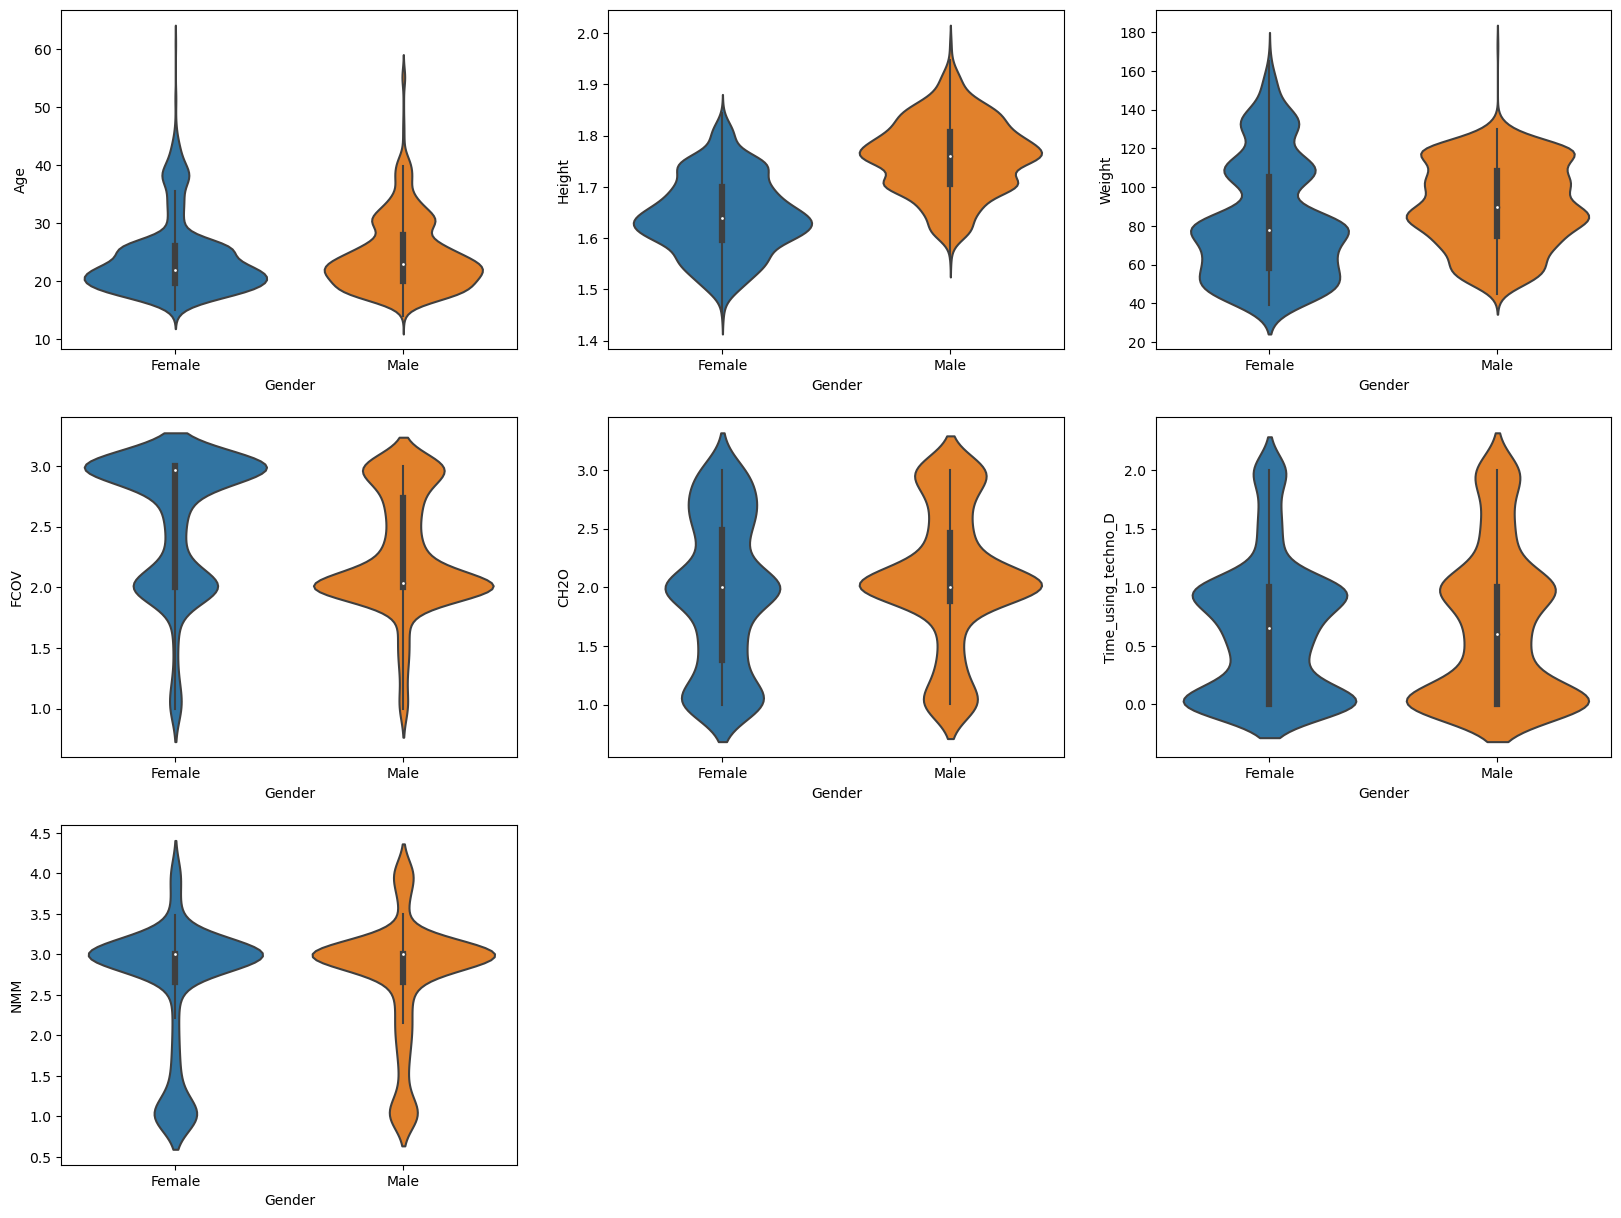

In [39]:
# kernel density estimation of continuous variable.
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.violinplot(x='Gender', y='Age', data=df)
plt.subplot(3,3,2)
sns.violinplot(x='Gender', y='Height', data=df)
plt.subplot(3,3,3)
sns.violinplot(x='Gender', y='Weight', data=df)
plt.subplot(3,3,4)
sns.violinplot(x='Gender', y='FCOV', data=df)
plt.subplot(3,3,5)
sns.violinplot(x='Gender', y='CH2O', data=df)
plt.subplot(3,3,6)
sns.violinplot(x='Gender', y='Time_using_techno_D', data=df)
plt.subplot(3,3,7)
sns.violinplot(x='Gender', y='NMM', data=df)
plt.show()

We can see here in avove violin plot that there is high skewness in age and number of main meals variable.
We will remove this skewness using IQR in preprocessing.

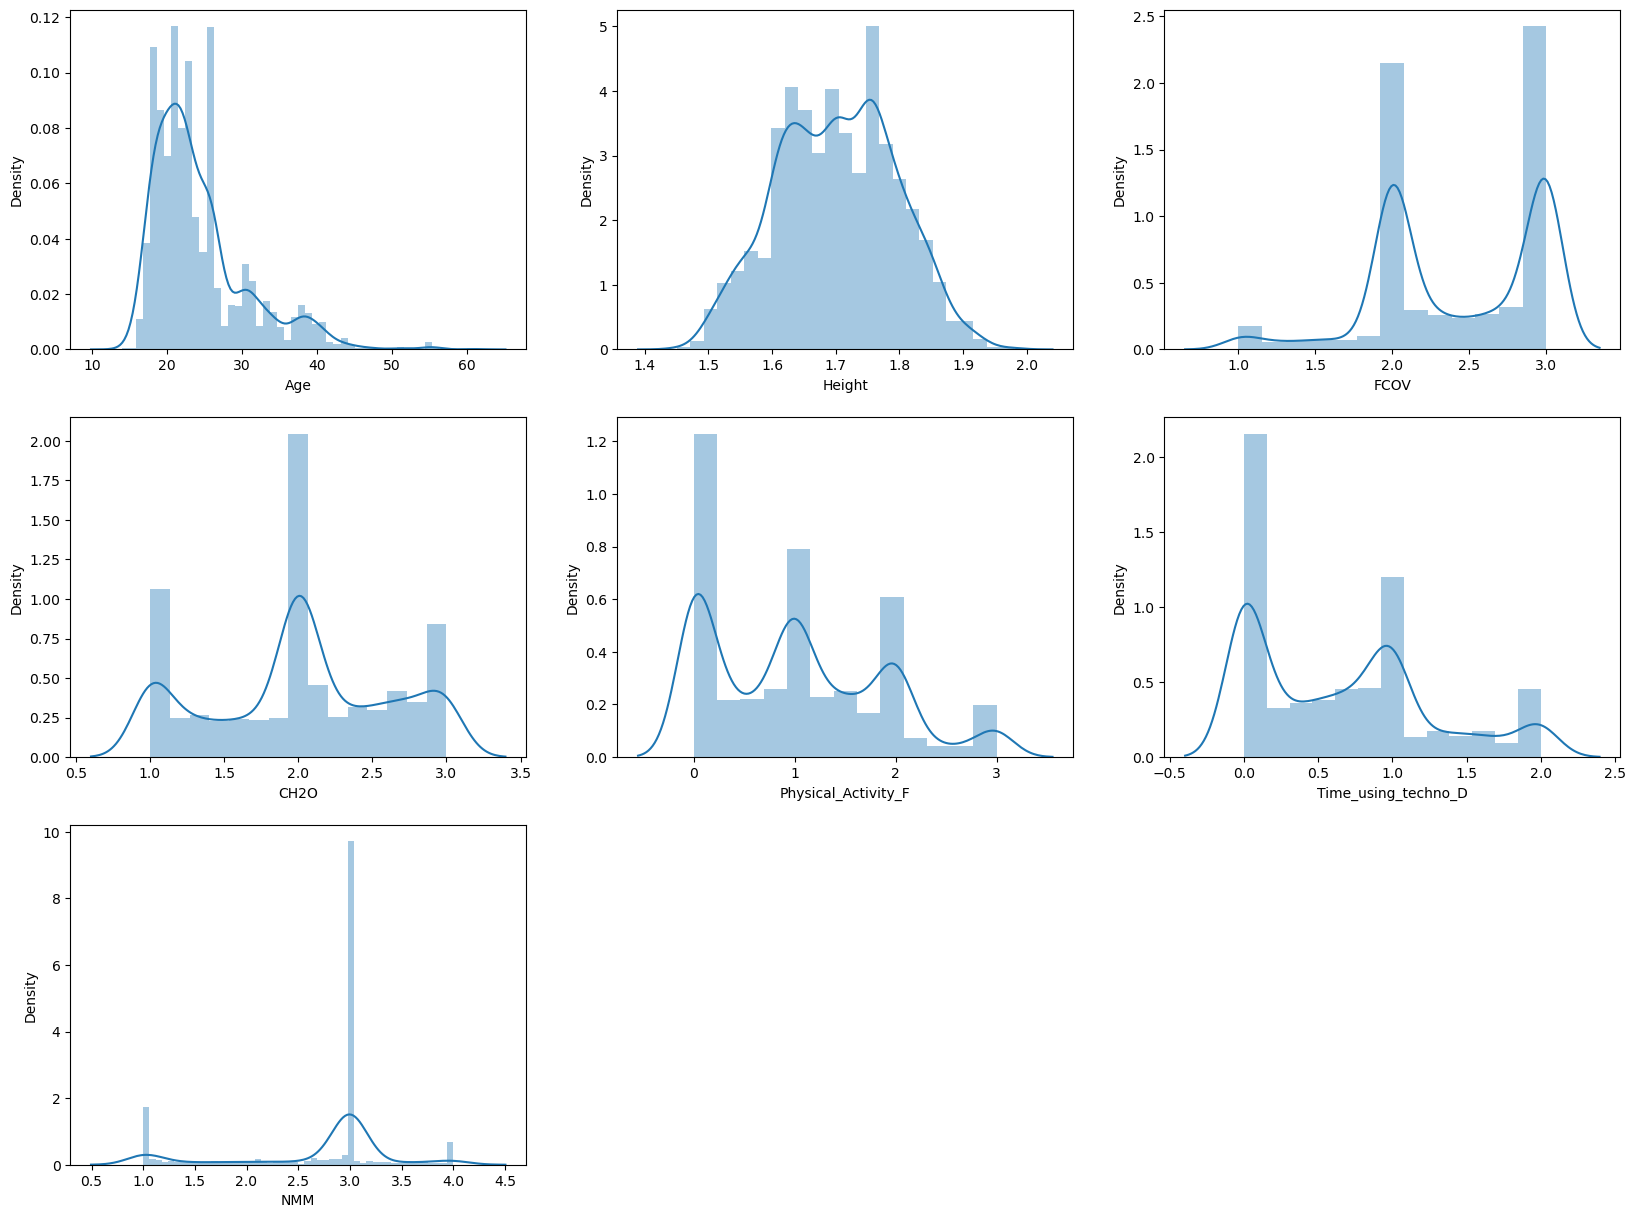

In [40]:
# Distribution plot
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.distplot(df['Age'])
plt.subplot(3,3,2)
sns.distplot(df['Height'])
plt.subplot(3,3,3)
sns.distplot(df['FCOV'])
plt.subplot(3,3,4)
sns.distplot(df['CH2O'])
plt.subplot(3,3,5)
sns.distplot(df['Physical_Activity_F'])
plt.subplot(3,3,6)
sns.distplot(df['Time_using_techno_D'])
plt.subplot(3,3,7)
sns.distplot(df['NMM'])
plt.show()

According to univariate distribution of observations it is clear 
- many features are multimodal in nature.
- Number of main meals(NMM) feature data is seems to be highly dense at one point.

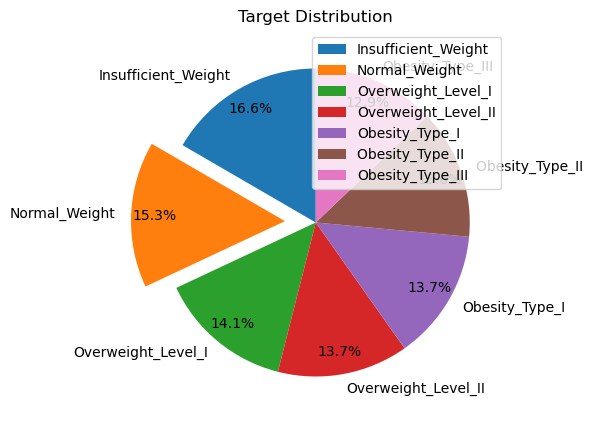

In [41]:
# Pie chart of target variable
plt.figure(figsize=(5, 5))
myexplode = [ 0, 0.2, 0, 0, 0, 0, 0]
plt.pie(df['NObesity'].value_counts(), labels=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II ', 'Obesity_Type_III'], 
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=myexplode)
plt.legend(loc='upper right')
plt.title("Target Distribution")
plt.show()

Note that distribution of target variables is balanced.

# Preprocessing

## Handling missing values 

Handling missing values is very important in machine learning.

if not you may end up building a biased model, leading to incorrect result.

Missing data can lead to lack of precision.


In [42]:
# check if there are any missing or null values left
df[df.isnull().any(axis=1)].head()

,Gender,Age,Height,Weight,Family_history_with_overweight,FCOHCF,FCOV,NMM,COFBM,Smoke,CH2O,Calorie_Consump_Monitoring,Physical_Activity_F,Time_using_techno_D,Consumption_Alc,MTRANS,NObesity


In [43]:
# Drop missing values - Check
df.dropna(inplace=True)

In [44]:
# Check for any remaining duplicates values
df.duplicated().any()

True

In [45]:
# Drpping duplicates if any
df.drop_duplicates(inplace=True)

In [46]:
df.shape # 24 duplicated values are removed

(2087, 17)

## Handling Outliers

Outliers significantly affect the process of estimating avearage and standard deviation resulting in overestimated or underestimated values.

therefore results of machine learning algorithm depends on handling of outliers.

In [47]:
for cols in df.columns:            
    if df[cols].dtype == object :       # Selecting only numerical column
        continue
    else:
        Q1 = df[cols].quantile(q=0.25)
        Q3 = df[cols].quantile(q=0.75)
        iqr = Q3-Q1
        
        low = Q1 - 1.5*(Q3-Q1)          
        high = Q3 + 1.5*(Q3-Q1)
        df.loc[(df[cols]<low) | (df[cols]>high),cols] = df[cols].median()   # Replacing outliers with median

 In the above code we have replaced outliers with median values of that column.

## Catagorical features

Many machiche learning algorithm cannot understand catagorical values. 

therefore it is best practice for performance of machine learning algorithm to convert catagorical features to machine understandable values.

In [48]:
df.dtypes=='object'

Gender                             True
Age                               False
Height                            False
Weight                            False
Family_history_with_overweight     True
FCOHCF                             True
FCOV                              False
NMM                               False
COFBM                              True
Smoke                              True
CH2O                              False
Calorie_Consump_Monitoring         True
Physical_Activity_F               False
Time_using_techno_D               False
Consumption_Alc                    True
MTRANS                             True
NObesity                           True
dtype: bool

In [49]:
df['Gender'], c =pd.factorize(df['Gender'])
df['Family_history_with_overweight'], c = pd.factorize(df['Family_history_with_overweight'])
df['FCOHCF'], c = pd.factorize(df['FCOHCF'])
df['Smoke'], c = pd.factorize(df['Smoke'])
df['Calorie_Consump_Monitoring'], c = pd.factorize(df['Calorie_Consump_Monitoring'])

In [50]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['NObesity'] = le.fit_transform(df['NObesity'])
df['COFBM'] = le.fit_transform(df['COFBM'])
df['Consumption_Alc'] = le.fit_transform(df['Consumption_Alc'])
df['MTRANS'] = le.fit_transform(df['MTRANS'])

In [485]:
df['NObesity'].

2    351
4    324
3    297
6    290
1    282
5    276
0    267
Name: NObesity, dtype: int64

In [52]:
df

,Gender,Age,Height,Weight,Family_history_with_overweight,FCOHCF,FCOV,NMM,COFBM,Smoke,CH2O,Calorie_Consump_Monitoring,Physical_Activity_F,Time_using_techno_D,Consumption_Alc,MTRANS,NObesity
0,0,21.000000,1.620000,64.000000,0,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,0,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,0,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,1,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,0,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,0,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,0,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,0,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


In [53]:
df.shape

(2087, 17)

# Train Test Split and Feature Scaling

In [240]:
# Now we will devide our dataframe into X and y.
# X -----> Independant features 
# y -----> Target feature

X = df.iloc[:,:-1]
y = df['NObesity']

Feature scaling

We have different features varying in scale and degrees of range.

Therefore in order for machine learning algorithm to interpret these features on same scale we need to perform feature scaling.

In [241]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
scaled

array([[-1.00817911, -0.47386602, -0.88786366, ...,  0.55421113,
         1.41183596,  0.50676794],
       [-1.00817911, -0.47386602, -1.96353116, ..., -1.09050525,
        -0.52283354,  0.50676794],
       [ 0.99188724,  0.00785179,  1.04833782, ...,  0.55421113,
        -2.45750303,  0.50676794],
       ...,
       [-1.00817911, -0.10678838,  0.5342333 , ..., -0.02754479,
        -0.52283354,  0.50676794],
       [-1.00817911,  0.3358862 ,  0.39702116, ..., -0.12664389,
        -0.52283354,  0.50676794],
       [-1.00817911,  0.16795287,  0.39041656, ...,  0.08404757,
        -0.52283354,  0.50676794]])

In [242]:
# Now using scatterplot will understand what changes has been made 

scaled_x = pd.DataFrame(scaled)
scaled_x.columns = list(X.columns)

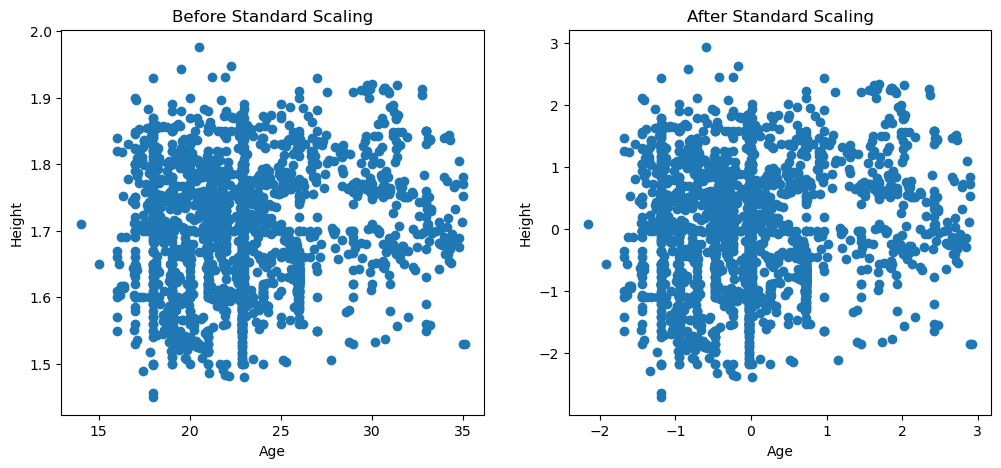

In [243]:
# scatterplot of before scaling and after scaling data.
# taking age and weight column as example.

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X.Age, X.Height)
ax1.set_title('Before Standard Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('Height')

ax2.scatter(scaled_x.Age, scaled_x.Height)
ax2.set_title('After Standard Scaling')
ax2.set_xlabel('Age')
ax2.set_ylabel('Height');

In [244]:
np.round(scaled_x.describe(),1)

,Gender,Age,Height,Weight,Family_history_with_overweight,FCOHCF,FCOV,NMM,COFBM,Smoke,CH2O,Calorie_Consump_Monitoring,Physical_Activity_F,Time_using_techno_D,Consumption_Alc,MTRANS
count,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0
mean,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-2.2,-2.7,-1.8,-0.5,-2.8,-2.7,-5.7,-4.0,-0.1,-1.7,-0.2,-1.2,-1.1,-4.4,-1.9
25%,-1.0,-0.7,-0.8,-0.8,-0.5,0.4,-0.8,0.2,0.3,-0.1,-0.7,-0.2,-1.0,-1.1,-0.5,0.5
50%,1.0,-0.0,-0.0,-0.1,-0.5,0.4,-0.0,0.2,0.3,-0.1,-0.0,-0.2,-0.0,-0.1,-0.5,0.5
75%,1.0,0.6,0.7,0.8,-0.5,0.4,1.1,0.2,0.3,-0.1,0.8,-0.2,0.8,0.6,1.4,0.5
max,1.0,2.9,2.9,3.0,2.2,0.4,1.1,3.8,2.5,6.8,1.6,4.6,2.3,2.2,1.4,1.3


### Assumption check

In [245]:
from scipy import stats

In [246]:
# Skewness of data
print('The skewness of data is :-\n',stats.skew(scaled))

The skewness of data is :-
 [-0.01629187  0.81520832 -0.03329851  0.23137158  1.7116574  -2.39170569
 -0.44787879 -2.86901571 -2.09262877  6.66733494 -0.10625321  4.33448963
  0.49396513  0.60878693  0.22469951 -1.26600866]


In [247]:
# Kurtosis of data
print('The kurtosis of data is :-\n',stats.kurtosis(scaled))

The kurtosis of data is :-
 [-1.99973458  0.23664082 -0.57462875 -0.73792304  0.92977105  3.72025611
 -0.62491844 13.5013899   5.78057282 42.45335514 -0.86441793 16.78780031
 -0.63930715 -0.55515889 -0.33812161 -0.23060541]


In [248]:
# Checking outliers using z-score
z_score = stats.zscore(df)
df[(z_score > 3).all(axis=1)]

,Gender,Age,Height,Weight,Family_history_with_overweight,FCOHCF,FCOV,NMM,COFBM,Smoke,CH2O,Calorie_Consump_Monitoring,Physical_Activity_F,Time_using_techno_D,Consumption_Alc,MTRANS,NObesity


In [249]:
# Creating dataframe of skewness and kurtosis
norm_data = pd.DataFrame()
norm_data['Atributes'] = X.columns
norm_data['Skewness'] = stats.skew(scaled)
norm_data['Kurtosis'] = stats.kurtosis(scaled)

In [250]:
norm_data

,Atributes,Skewness,Kurtosis
0,Gender,-0.016292,-1.999735
1,Age,0.815208,0.236641
2,Height,-0.033299,-0.574629
3,Weight,0.231372,-0.737923
4,Family_history_with_overweight,1.711657,0.929771
5,FCOHCF,-2.391706,3.720256
6,FCOV,-0.447879,-0.624918
7,NMM,-2.869016,13.501390
8,COFBM,-2.092629,5.780573
9,Smoke,6.667335,42.453355


### Feature Selection

In [251]:
# Performing feature selection using Decision Tree
from sklearn.tree import DecisionTreeClassifier
FS_dt = DecisionTreeClassifier(max_depth=10).fit(scaled, y)

In [252]:
# Creating a dataframe of feature_importances_
feature_select = pd.DataFrame()
feature_select['Features'] = X.columns
feature_select['feature_importances_'] = FS_dt.feature_importances_
feature_select.sort_values(by='feature_importances_', ascending=False)

,Features,feature_importances_
3,Weight,0.472258
2,Height,0.218418
0,Gender,0.161920
1,Age,0.042223
14,Consumption_Alc,0.025655
5,FCOHCF,0.019895
6,FCOV,0.017149
8,COFBM,0.011361
10,CH2O,0.007992
15,MTRANS,0.006903


In [253]:
# Selecting only imp features
l = ['Weight','Height','Gender','Consumption_Alc','FCOHCF','FCOV','COFBM','CH2O','Time_using_techno_D','Physical_Activity_F']
scaled_x = scaled_x[l]

In [254]:
# Dropping columns
#scaled = scaled_x.drop(columns=['NMM'],axis=1)

In [255]:
# Randomly sampling dataset into train and test set 

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(scaled_x, y, test_size=0.2, random_state=40)

In [256]:
train_X.shape

(1669, 10)

In [257]:
test_X.shape

(418, 10)

# Model Implementation

Now we will try to fit 2-5 models on data and choose best one which is performing better for model deployment.

following are the classification models that we are going to implement

- Logistic Regression
- Decision Tree
- K-nearest-neighbor
- Support Vector Classifier
- Random Forest

## Model 1 - Logistic Regression

In [258]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [259]:
# Creating a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(train_X, train_y)  # Fitting the mmodel

LogisticRegression()

In [334]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' %logistic_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' % logistic_model.score(test_X, test_y)) 

Training score is:- 0.89
Testing score is:- 0.91


In [261]:
# Predicting the model 
pred_logistic = logistic_model.predict(test_X)

In [262]:
# Determining accuracy of model using confusion matrix
result_logistic = confusion_matrix(test_y, pred_logistic)
result_logistic

array([[47,  0,  0,  0,  0,  0,  0],
       [ 7, 48,  0,  0,  0,  2,  1],
       [ 0,  0, 69,  7,  1,  0,  1],
       [ 0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  6],
       [ 0,  0,  5,  0,  0,  8, 52]], dtype=int64)

In [337]:
# Accuracy using accuracy_score
logistic_model_accuarcy = accuracy_score(test_y, pred_logistic)
print('logistic_model_accuarcy:- %0.2f' % logistic_model_accuarcy)

logistic_model_accuarcy:- 0.91


In [264]:
logistic_model_CR = classification_report(test_y, pred_logistic)
print(logistic_model_CR)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        47
           1       1.00      0.83      0.91        58
           2       0.93      0.88      0.91        78
           3       0.89      1.00      0.94        59
           4       0.98      1.00      0.99        62
           5       0.81      0.88      0.84        49
           6       0.87      0.80      0.83        65

    accuracy                           0.91       418
   macro avg       0.91      0.91      0.91       418
weighted avg       0.91      0.91      0.91       418



## Model 2 - Decision Tree

In [265]:
from sklearn.tree import DecisionTreeClassifier

In [342]:
dt_model = DecisionTreeClassifier(max_depth=4)  # Creating DT model

In [343]:
dt_model.fit(train_X, train_y)  # Training the model

DecisionTreeClassifier(max_depth=4)

In [344]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' % dt_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' % dt_model.score(test_X, test_y)) 

Training score is:- 0.79
Testing score is:- 0.79


In [345]:
# Predicting the model 
pred_dt = dt_model.predict(test_X)

In [346]:
# Determining accuracy of model using confusion matrix
result_dt = confusion_matrix(test_y, pred_dt)
result_dt

array([[42,  5,  0,  0,  0,  0,  0],
       [ 6, 32,  0,  0,  0, 16,  4],
       [ 0,  0, 55,  4,  0,  2, 17],
       [ 0,  0,  3, 56,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0],
       [ 0,  4,  0,  0,  0, 29, 16],
       [ 0,  0,  3,  0,  0,  7, 55]], dtype=int64)

In [347]:
# Accuracy using accuracy_score
dt_model_accuarcy = accuracy_score(test_y, pred_dt)
print('dt_model_accuarcy:- %0.2f' % dt_model_accuarcy)

dt_model_accuarcy:- 0.79


In [348]:
dt_model_CR = classification_report(test_y, pred_dt)
print(dt_model_CR)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        47
           1       0.78      0.55      0.65        58
           2       0.90      0.71      0.79        78
           3       0.93      0.95      0.94        59
           4       1.00      1.00      1.00        62
           5       0.54      0.59      0.56        49
           6       0.60      0.85      0.70        65

    accuracy                           0.79       418
   macro avg       0.80      0.79      0.79       418
weighted avg       0.81      0.79      0.79       418



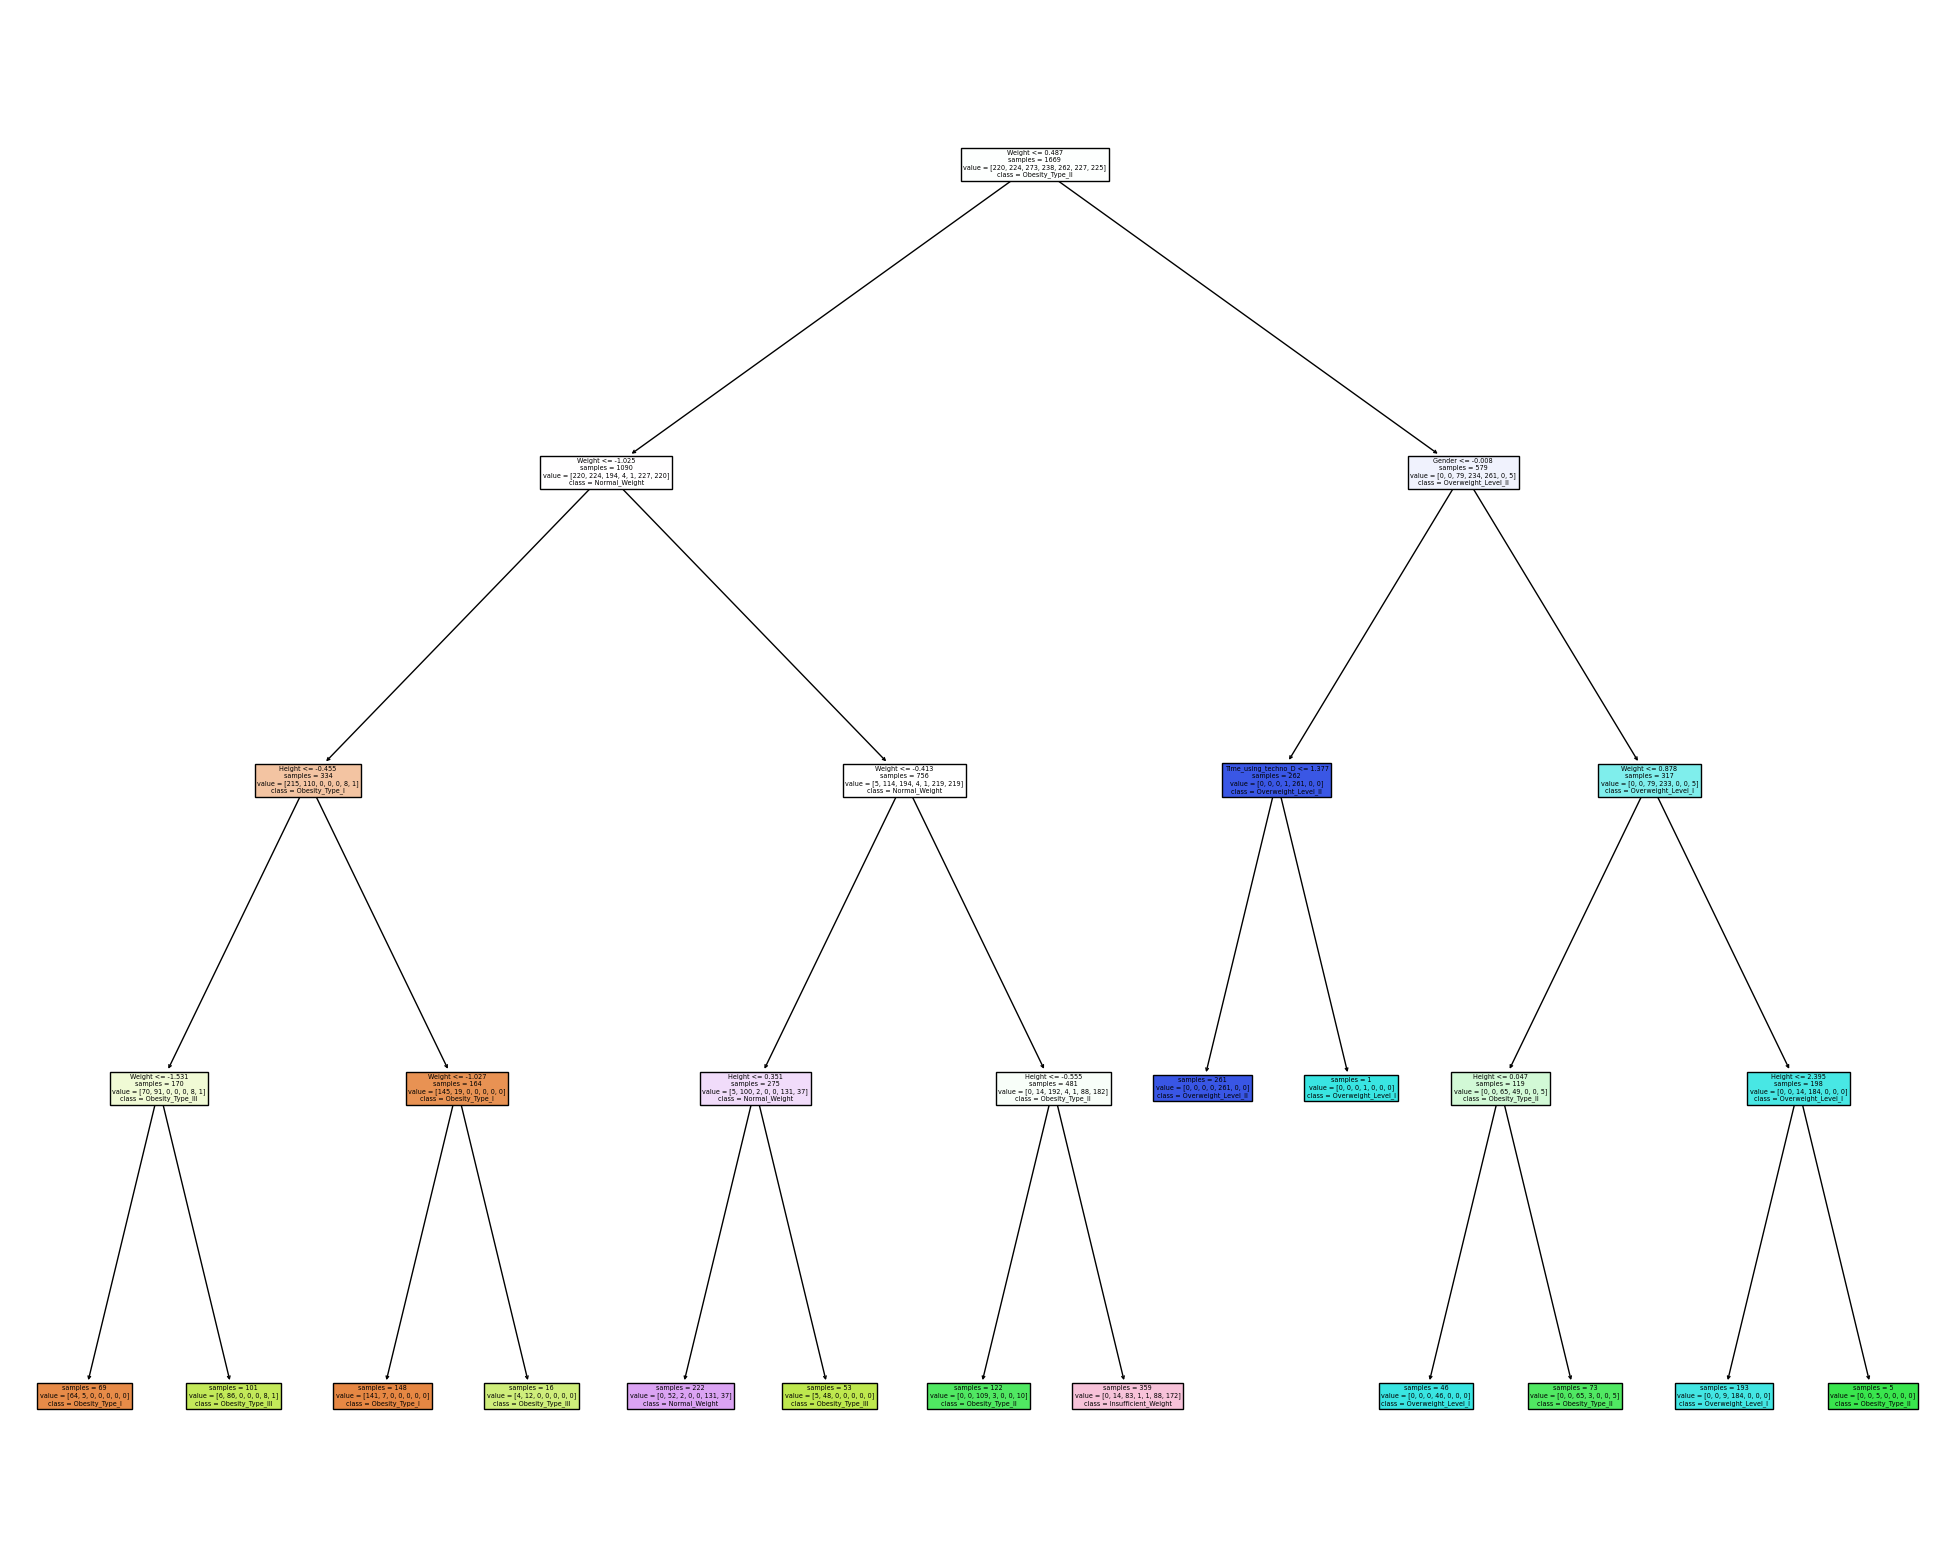

In [361]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
names = scaled_x.columns
class1 = ['Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight']

_ = tree.plot_tree(dt_model, 
                   feature_names=names,  
                   class_names=class1,
                   impurity=False,
                   filled=True)

## Model 3 - Supprt Vector Classification

In [291]:
from sklearn.svm import SVC

In [293]:
# Creating the model
svc_model = SVC()
svc_model.fit(train_X, train_y)

SVC()

In [362]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' % svc_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' % svc_model.score(test_X, test_y)) 

Training score is:- 0.92
Testing score is:- 0.90


In [295]:
# Predicting the model 
pred_svc = svc_model.predict(test_X)

In [296]:
# Determining accuracy of model using confusion matrix
result_svc = confusion_matrix(test_y, pred_svc)
result_svc

array([[44,  3,  0,  0,  0,  0,  0],
       [ 4, 48,  0,  0,  0,  4,  2],
       [ 0,  2, 72,  2,  0,  0,  2],
       [ 0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0],
       [ 0,  2,  0,  0,  0, 38,  9],
       [ 0,  3,  3,  0,  0,  5, 54]], dtype=int64)

In [363]:
# Accuracy using accuracy_score
svc_model_accuarcy = accuracy_score(test_y, pred_svc)
print('dt_model_accuarcy:-%0.2f' % svc_model_accuarcy)

dt_model_accuarcy:-0.90


In [298]:
svc_model_CR = classification_report(test_y, pred_svc)
print(svc_model_CR)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        47
           1       0.83      0.83      0.83        58
           2       0.96      0.92      0.94        78
           3       0.97      1.00      0.98        59
           4       1.00      1.00      1.00        62
           5       0.81      0.78      0.79        49
           6       0.81      0.83      0.82        65

    accuracy                           0.90       418
   macro avg       0.90      0.90      0.90       418
weighted avg       0.90      0.90      0.90       418



# Model 4 - KNN

In [299]:
from sklearn.neighbors import KNeighborsClassifier

In [382]:
knn_accuracy_list = []                                    # store accuracy in list
for k in range(5):
    k = k+1
    knn_model = KNeighborsClassifier(n_neighbors= k)      # creating the model
    knn_model.fit(train_X, train_y)                       # fitting the model
    print('Training score is:- %0.2f' % knn_model.score(train_X, train_y)) 
    print('Testing score is:- %0.2f' % knn_model.score(test_X, test_y)) 
    pred_knn = knn_model.predict(test_X)                  # make prediction on test dataset
    result_knn = confusion_matrix(test_y, pred_knn)       # creating the confusion matrix
    knn_acc_score = accuracy_score(test_y, pred_knn)      
    print('The accuracy of knn model for k=',k, 'is %0.2f' %knn_acc_score)
    print('The confusion matrix is\n', result_knn)
    knn_accuracy_list.append(knn_acc_score)

Training score is:- 1.00
Testing score is:- 0.82
The accuracy of knn model for k= 1 is 0.82
The confusion matrix is
 [[42  4  1  0  0  0  0]
 [ 9 26  3  0  0 13  7]
 [ 1  1 63  2  0  4  7]
 [ 0  0  0 59  0  0  0]
 [ 0  0  0  0 62  0  0]
 [ 1  4  2  0  0 38  4]
 [ 1  2  4  0  1  6 51]]
Training score is:- 0.91
Testing score is:- 0.77
The accuracy of knn model for k= 2 is 0.77
The confusion matrix is
 [[43  4  0  0  0  0  0]
 [13 29  5  0  1  6  4]
 [ 2  1 65  2  1  4  3]
 [ 0  0  1 58  0  0  0]
 [ 0  0  0  0 62  0  0]
 [ 3  9  6  0  0 30  1]
 [ 2  8 11  0  1  7 36]]
Training score is:- 0.88
Testing score is:- 0.77
The accuracy of knn model for k= 3 is 0.77
The confusion matrix is
 [[41  5  0  0  0  1  0]
 [15 28  5  0  0  4  6]
 [ 2  2 60  3  1  4  6]
 [ 0  0  0 59  0  0  0]
 [ 0  0  0  0 62  0  0]
 [ 2  8  3  0  0 33  3]
 [ 2  9  8  0  0  6 40]]
Training score is:- 0.86
Testing score is:- 0.76
The accuracy of knn model for k= 4 is 0.76
The confusion matrix is
 [[43  3  0  0  0  0  1]
 

In [383]:
print('The maximum accuracy using KNN model is : %0.2f' %max(knn_accuracy_list))

The maximum accuracy using KNN model is : 0.82


In [384]:
knn_model = KNeighborsClassifier(n_neighbors= 7)      
knn_model.fit(train_X, train_y)                      
pred_knn = knn_model.predict(test_X)

In [385]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' % knn_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' % knn_model.score(test_X, test_y)) 

Training score is:- 0.82
Testing score is:- 0.73


In [386]:
# Determining accuracy of model using confusion matrix
result_knn = confusion_matrix(test_y, pred_knn)
result_knn

array([[38,  4,  0,  0,  0,  3,  2],
       [14, 19, 10,  0,  0,  6,  9],
       [ 2,  2, 62,  4,  1,  4,  3],
       [ 0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0],
       [ 2,  5,  7,  1,  0, 31,  3],
       [ 2,  4,  9,  4,  0, 11, 35]], dtype=int64)

In [387]:
knn_model_CR = classification_report(test_y, pred_knn)
print(knn_model_CR)

              precision    recall  f1-score   support

           0       0.66      0.81      0.72        47
           1       0.56      0.33      0.41        58
           2       0.70      0.79      0.75        78
           3       0.87      1.00      0.93        59
           4       0.98      1.00      0.99        62
           5       0.56      0.63      0.60        49
           6       0.67      0.54      0.60        65

    accuracy                           0.73       418
   macro avg       0.72      0.73      0.71       418
weighted avg       0.72      0.73      0.72       418



## Model 5 - Random Forest 

In [323]:
from sklearn.ensemble import RandomForestClassifier

In [328]:
# Creating the model
rf_model = RandomForestClassifier()
# Training the model
rf_model.fit(train_X, train_y)

RandomForestClassifier()

In [329]:
# Predicting the model 
pred_rf = rf_model.predict(test_X)

In [401]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' %rf_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' %rf_model.score(test_X, test_y)) 

Training score is:- 1.00
Testing score is:- 0.96


In [331]:
# Determining accuracy of model using confusion matrix
result_rf = confusion_matrix(test_y, pred_rf)
result_rf

array([[46,  1,  0,  0,  0,  0,  0],
       [ 2, 52,  0,  0,  0,  3,  1],
       [ 0,  1, 73,  0,  0,  1,  3],
       [ 0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0],
       [ 0,  1,  0,  0,  0, 47,  1],
       [ 0,  0,  1,  0,  0,  1, 63]], dtype=int64)

In [402]:
print('The accuracy of the model is :-%0.2f' %accuracy_score(test_y, pred_rf))

The accuracy of the model is :-0.96


In [326]:
# Classification report
rf_model_CR = classification_report(test_y, pred_rf)
print(rf_model_CR)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        47
           1       0.87      0.91      0.89        58
           2       0.99      0.96      0.97        78
           3       1.00      1.00      1.00        59
           4       1.00      1.00      1.00        62
           5       0.90      0.92      0.91        49
           6       0.94      0.94      0.94        65

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



# Hypertuning 

- We have tried total five models for estimation of obesity out of this only Logistic Regression and Random Forest performed well with accuracy of 91% and 95% respectivly.
- Now we will hypertune this two models using GridSearch_CV.
- It will also prevent the overfitting of the model.

#### Hypertuning-Logistic Regression

In [390]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [397]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 40)

tuned_paramaters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                     'penalty':['none', 'elasticnet', 'l1', 'l2'],
                     'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

logreg = LogisticRegression()                                  
grid_search_logreg = GridSearchCV(logreg,
                          param_grid=tuned_paramaters, 
                          cv=folds, 
                          scoring='accuracy',
                          verbose=0)

grid_search_logreg.fit(train_X, train_y)    

GridSearchCV(cv=KFold(n_splits=5, random_state=40, shuffle=True),
             estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['none', 'elasticnet', 'l1', 'l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             scoring='accuracy')

In [398]:
print(grid_search_logreg.best_score_)
print(grid_search_logreg.best_params_)
print(grid_search_logreg.best_estimator_)

0.9544550538562515
{'C': 0.001, 'penalty': 'none', 'solver': 'lbfgs'}
LogisticRegression(C=0.001, penalty='none')


In [399]:
# Creating model on hypertuned parameters
logreg_hyper_model= LogisticRegression(C=0.001, penalty='none', solver='lbfgs')
logreg_hyper_model = logreg_hyper_model.fit(train_X,train_y)
pred_logreg_hyper_model = logreg_hyper_model.predict(test_X)

In [400]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' %logreg_hyper_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' %logreg_hyper_model.score(test_X, test_y)) 

Training score is:- 0.97
Testing score is:- 0.96


In [403]:
print('The final accuracy of the model is :-%0.2f' %accuracy_score(test_y, pred_logreg_hyper_model))

The final accuracy of the model is :-0.96


In [404]:
# Determining accuracy of model using confusion matrix
result_logreg_hyper_model = confusion_matrix(test_y, pred_logreg_hyper_model)
result_logreg_hyper_model

array([[46,  1,  0,  0,  0,  0,  0],
       [ 1, 57,  0,  0,  0,  0,  0],
       [ 0,  0, 75,  3,  0,  0,  0],
       [ 0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0],
       [ 0,  2,  0,  0,  0, 43,  4],
       [ 0,  0,  3,  0,  0,  1, 61]], dtype=int64)

In [405]:
# Classification report
logreg_hyper_model_CR = classification_report(test_y, pred_logreg_hyper_model)
print(logreg_hyper_model_CR)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.95      0.98      0.97        58
           2       0.96      0.96      0.96        78
           3       0.95      1.00      0.98        59
           4       1.00      1.00      1.00        62
           5       0.98      0.88      0.92        49
           6       0.94      0.94      0.94        65

    accuracy                           0.96       418
   macro avg       0.97      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



#### Hypertuning- Random Forest

In [413]:
folds = KFold(n_splits = 3, shuffle = True, random_state = 40)

tuned_paramaters = [{'criterion':['entropy'], 
                     'max_depth':list(range(1,6)), 
                     'min_samples_split':list(range(1,5)), 
                     'min_samples_leaf':list(range(1,5)),
                     'max_features':list(range(1,5))}]

rf = RandomForestClassifier()                                  
grid_search_rf = GridSearchCV(rf,
                          param_grid=tuned_paramaters, 
                          cv=folds,
                          scoring='accuracy')

grid_search_rf.fit(train_X, train_y)      

GridSearchCV(cv=KFold(n_splits=3, random_state=40, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['entropy'],
                          'max_depth': [1, 2, 3, 4, 5],
                          'max_features': [1, 2, 3, 4],
                          'min_samples_leaf': [1, 2, 3, 4],
                          'min_samples_split': [1, 2, 3, 4]}],
             scoring='accuracy')

In [414]:
print(grid_search_rf.best_score_)
print(grid_search_rf.best_params_)
print(grid_search_rf.best_estimator_)

0.8747658964390427
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 3}
RandomForestClassifier(criterion='entropy', max_depth=5, max_features=4,
                       min_samples_leaf=3, min_samples_split=3)


In [415]:
# Creating model on hypertuned parameters
rf_hyper_model= RandomForestClassifier(criterion='entropy', max_depth=5, max_features=4,
                       min_samples_leaf=3, min_samples_split=3)
rf_hyper_model = rf_hyper_model.fit(train_X,train_y)
pred_rf_hyper_model = logreg_hyper_model.predict(test_X)

In [416]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' %rf_hyper_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' %rf_hyper_model.score(test_X, test_y)) 

Training score is:- 0.91
Testing score is:- 0.92


In [417]:
print('The final accuracy of the model is :-%0.2f' %accuracy_score(test_y, pred_rf_hyper_model))

The final accuracy of the model is :-0.96


In [418]:
# Determining accuracy of model using confusion matrix
result_rf_hyper_model = confusion_matrix(test_y, pred_rf_hyper_model)
result_rf_hyper_model

array([[46,  1,  0,  0,  0,  0,  0],
       [ 1, 57,  0,  0,  0,  0,  0],
       [ 0,  0, 75,  3,  0,  0,  0],
       [ 0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0],
       [ 0,  2,  0,  0,  0, 43,  4],
       [ 0,  0,  3,  0,  0,  1, 61]], dtype=int64)

In [419]:
# Classification report
rf_hyper_model_CR = classification_report(test_y, pred_rf_hyper_model)
print(rf_hyper_model_CR)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.95      0.98      0.97        58
           2       0.96      0.96      0.96        78
           3       0.95      1.00      0.98        59
           4       1.00      1.00      1.00        62
           5       0.98      0.88      0.92        49
           6       0.94      0.94      0.94        65

    accuracy                           0.96       418
   macro avg       0.97      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



### Result :-

In [421]:
Final_score = pd.DataFrame({'Model':['model_1 (LR)','model_2 (MT)','model_3 (SVC)','model_4 (KNN)','model_5 (RF)'], 'Accuracy':[0.91,0.79, 0.90, 0.73, 0.96], 'Accuracy_after_hypertuning':[0.96,'NA', 'NA', 'NA', 0.96]})
Final_score

,Model,Accuracy,Accuracy_after_hypertuning
0,model_1 (LR),0.91,0.96
1,model_2 (MT),0.79,NA
2,model_3 (SVC),0.90,NA
3,model_4 (KNN),0.73,NA
4,model_5 (RF),0.96,0.96


#### ROC-AUC

In [480]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

In [448]:
train_y_roc = label_binarize(train_y, classes=[0,1,2,3,4,5,6])
num_classes = train_y_roc.shape[1]
num_classes

7

In [474]:
test_y_roc = label_binarize(test_y, classes=[0,1,2,3,4,5,6])

In [475]:
# Using one vs rest classifier
classifier = OneVsRestClassifier(LogisticRegression(C=0.001, penalty='none', solver='lbfgs'))
classifier.fit(train_X, train_y_roc)
y_score = classifier.predict(test_X)

In [476]:
# Creating dictionary for false positive, true positive and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

In [477]:
y_score.shape

(418, 7)

In [478]:
test_y_roc.shape

(418, 7)

In [482]:
# Execute ROC curve and compute ROC area for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y_roc[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

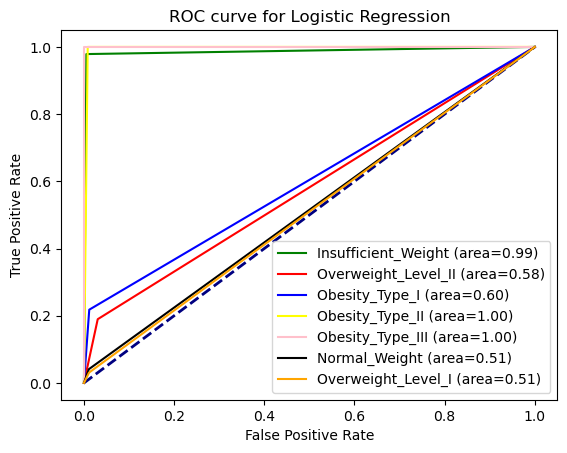

In [493]:
# Plotting ROC curve for all classes
plt.figure()
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.plot(fpr[0],tpr[0], color='green', label='Insufficient_Weight (area=%0.2f)' %roc_auc[0])
plt.plot(fpr[1],tpr[1], color='red', label='Overweight_Level_II (area=%0.2f)' %roc_auc[1])
plt.plot(fpr[2],tpr[2], color='blue', label='Obesity_Type_I (area=%0.2f)' %roc_auc[2])
plt.plot(fpr[3],tpr[3], color='yellow', label='Obesity_Type_II (area=%0.2f)' %roc_auc[3])
plt.plot(fpr[4],tpr[4], color='pink', label='Obesity_Type_III (area=%0.2f)' %roc_auc[4])
plt.plot(fpr[5],tpr[5], color='black', label='Normal_Weight (area=%0.2f)' %roc_auc[5])
plt.plot(fpr[6],tpr[6], color='orange', label='Overweight_Level_I (area=%0.2f)' %roc_auc[6])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

As mentioned in above dataframe model_1 and model_5 i.e. Logistic Regression and Random Forest Classifier performed better in predicting target variables.

Before performing hypertuning only logistic regression has given generelized model with accuracy of 91 %. same after hypertuning goes up to 96 %.

In case of Random Forest after performing hypertuning the the model is generalized with accuracy of 91 %.

From the above ROC curve of Logistic Regression we can say that model performs better in predicting values of Insufficient_Weight, Obesity_Type_II and Obesity_Type_III.

## Summary :

In this notebook we have performed different task like-

- Importing data 
- Exploratory data analysis
- Handling missing values
- Handling outliers 
- Handling catagorical features
- Feature scaling
- Assumption check
- Feature selection
- Sampling the data 
- Training different models 
- Hypertuning
- Result

 In this data Logistic regression and Random forest models performed very well with accuracy of 96%. 

**Usefull cases**

- This type of model can be usefull for performing online surveys and to give personalized recomendations regarding fitness.

- Online Fitness Apps

In [436]:
#df.to_csv("Eastimation_of_obesity_processed_data.csv", index = False)

In [437]:
#import pickle
#pickle.dump(logreg_hyper_model, open("logreg_hyper_model_96.pkl", "wb"))
#pickle.dump(rf_hyper_model, open("rf_hyper_model_96.pkl", "wb"))